# Simple Linear Regression Assignment 1

### Delivery_time :- Predict delivery time using sorting time

In [1]:
# Importing Libararies.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_style('Darkgrid')
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

### Reading Dataset

In [2]:
df=pd.read_csv('delivery_time.csv')

In [3]:
df = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)

In [4]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [6]:
df.describe().T     # transposing rows to column

,count,mean,std,min,25%,50%,75%,max
Delivery_Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting_Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


In [7]:
df.isnull().sum()   # no null values

Delivery_Time    0
Sorting_Time     0
dtype: int64

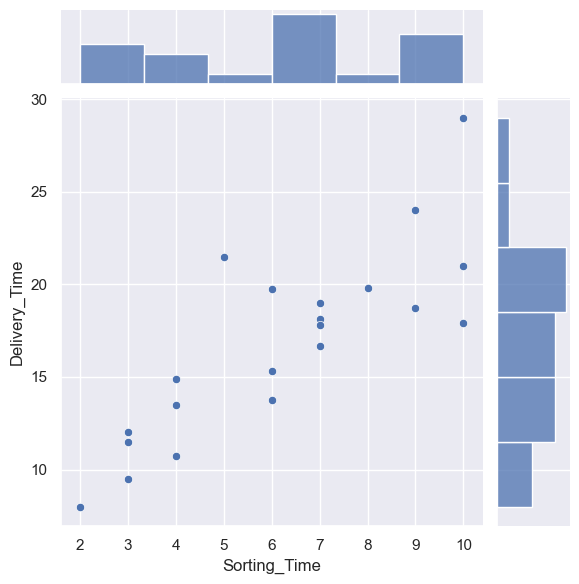

In [8]:
sns.jointplot(df,y='Delivery_Time',x='Sorting_Time')   # Checking correlation between independent and dependent variable.

<Axes: >

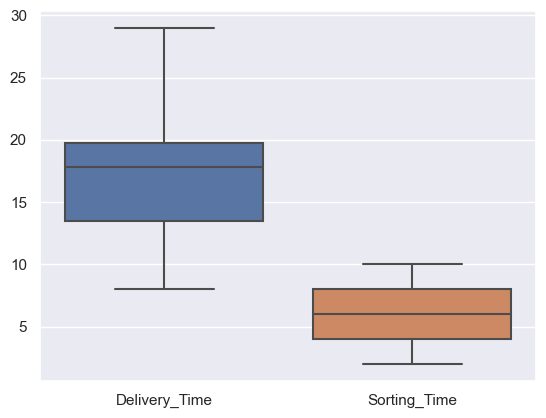

In [9]:
sns.boxplot(df)   # no outliers

In [10]:
##Checking correlation between both the variables:-
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


### Model Building

In [11]:
#sns.distplot(df['Delivery_Time'])

In [12]:
#sns.distplot(df['Sorting_Time'])

In [13]:
X=df.iloc[:,1].values
y=df.iloc[:,0].values

In [14]:
X,y

(array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
         7,  2,  7,  5], dtype=int64),
 array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
        18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
         8.  , 17.83, 21.5 ]))

In [15]:
#X.reshape(-1,1)     # we are converting X into 2d array to avoid getting value error while fitting model.

In [39]:
model =smf.ols("y~X",df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        19:27:02   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
X              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As you can notice in the above model
- The R-squared and Adjusted R-squared scores are still below 0.85.
- It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction
- Lets Try some data transformation to check whether these scores can get any higher than this.

In [17]:
model.params

Intercept    6.582734
X            1.649020
dtype: float64

In [18]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [19]:
model.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

Text(0.5, 1.0, 'Best Fit Line between ')

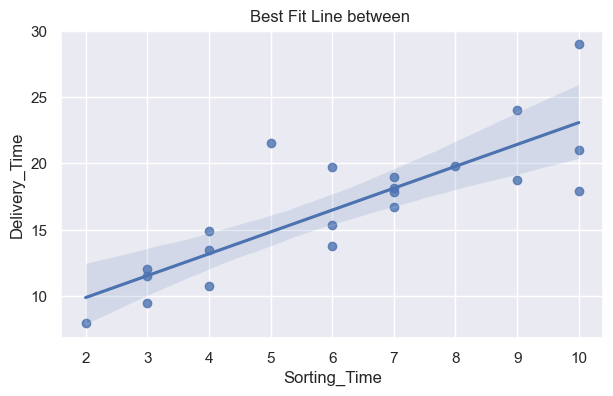

In [20]:
# Best Fit line
plt.figure(figsize=(7,4))
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=df)
plt.title("Best Fit Line between ")

As we find out the value of Adj-R is low, We will try log function

### Transforming our data

In [42]:
#  Using logrithmic function on Sorting Time:
model2= smf.ols("y~np.log(X)",data=df).fit()

In [81]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           2.64e-06
Time:                        19:58:21   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(X)      9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
model2.predict()

array([21.98291253, 13.69651659, 17.36330521, 21.03009382, 21.98291253,
       17.36330521, 18.75735354, 11.09488867, 21.98291253, 21.03009382,
       19.96493314, 13.69651659, 18.75735354, 11.09488867, 11.09488867,
       13.69651659, 17.36330521, 18.75735354,  7.42810005, 18.75735354,
       15.71449599])

### As you can notice in the above model
- The R-squared and Adjusted R-squared scores have increased but are still below 0.85.
- It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction
- Lets Try some data transformation to check whether these scores can get any higher than this.

In [44]:
model3=smf.ols("np.log(y)~X",data=df).fit()

In [45]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.59e-06
Time:                        19:36:14   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
X              0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As you can notice in the above model
- The R-squared and Adjusted R-squared scores have increased but are still below 0.85.
- It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction
- Lets Try some data transformation to check whether these scores can get any higher than this.

In [47]:
model4=smf.ols("np.log(y)~np.log(X)",data=df).fit()

In [63]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.60e-07
Time:                        19:48:40   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(X)      0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
model2.predict()

array([21.98291253, 13.69651659, 17.36330521, 21.03009382, 21.98291253,
       17.36330521, 18.75735354, 11.09488867, 21.98291253, 21.03009382,
       19.96493314, 13.69651659, 18.75735354, 11.09488867, 11.09488867,
       13.69651659, 17.36330521, 18.75735354,  7.42810005, 18.75735354,
       15.71449599])

In [149]:
X

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5], dtype=int64)

### As you can notice in the above model
- The R-squared and Adjusted R-squared scores have increased but are still below 0.85.
- It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction
- **Since the value of R-squared and Adj. R-squared is highest in model4 we will consider this model.**

In [150]:
pred1=model.predict()
pred2=model2.predict()
pred3=model3.predict()
pred4=model4.predict()    # In scatter plot model2 seems to be working best.i.e closest to the actual values.

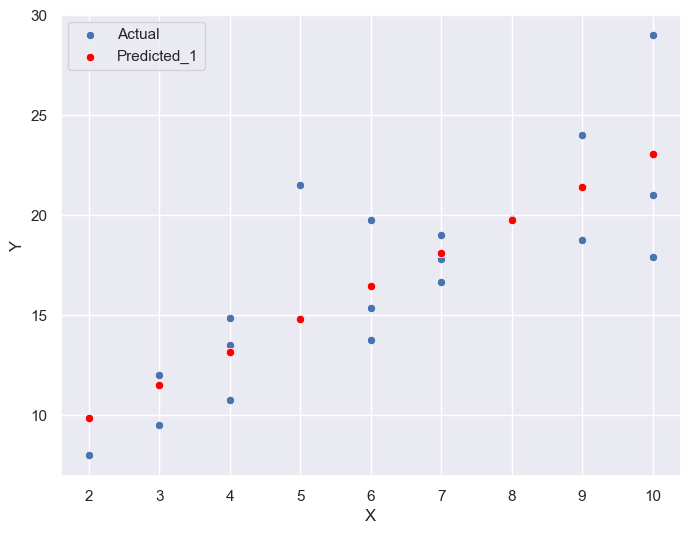

In [124]:
# Create a scatter plot of the actual vs predicted values without transformation.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y, label='Actual') 
sns.scatterplot(x=X, y=pred1, color='red', label='Predicted_1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


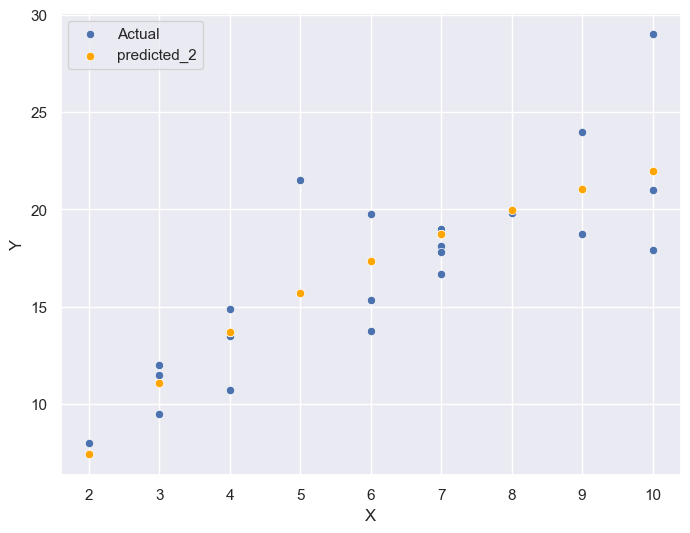

In [105]:
# Create a scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y, label='Actual') 
sns.scatterplot(x=X,y=pred2, color='orange', label='predicted_2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


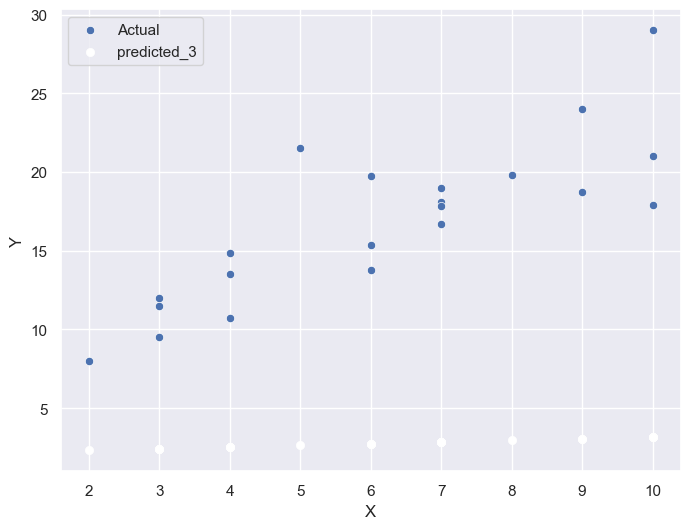

In [106]:
# Create a scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y, label='Actual') 
sns.scatterplot(x=X,y=pred3, color='white', label='predicted_3')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


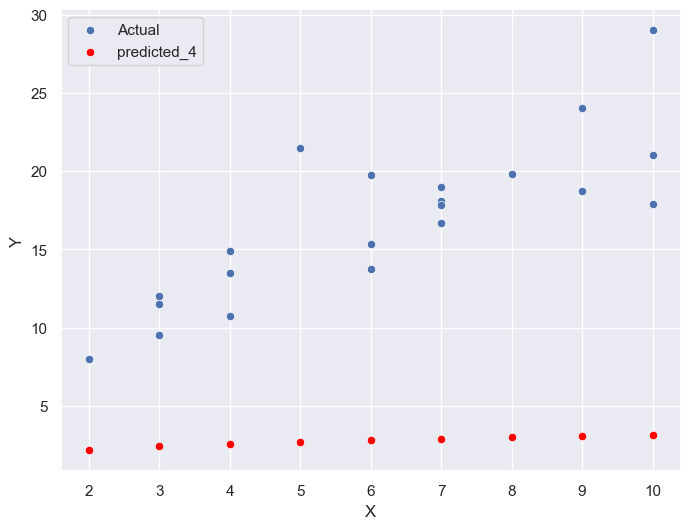

In [107]:
# Create a scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y, label='Actual') 
sns.scatterplot(x=X,y=pred4, color='red', label='predicted_4')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


### Model Validation:
- Comparing different models with respect to their Root Mean Squared Errors
- We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of    negative numbers) between the model’s predicted target value and the actual target value.

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [131]:
from sklearn import metrics

In [132]:
print('MAE',metrics.mean_absolute_error(y,pred1))
print('MSE',metrics.mean_squared_error(y,pred1))
print('RMSE',np.sqrt(metrics.mean_squared_error(y,pred1)))

MAE 2.0857409551882653
MSE 7.793311548584063
RMSE 2.7916503270617654


In [133]:
print('MAE',metrics.mean_absolute_error(y,pred2))
print('MSE',metrics.mean_squared_error(y,pred2))
print('RMSE',np.sqrt(metrics.mean_squared_error(y,pred2)))

MAE 2.0473757067928995
MSE 7.470226320948425
RMSE 2.733171476682066


In [134]:
print('MAE',metrics.mean_absolute_error(y,pred3))
print('MSE',metrics.mean_squared_error(y,pred3))
print('RMSE',np.sqrt(metrics.mean_squared_error(y,pred3)))

MAE 14.01616587212325
MSE 218.90732155191174
RMSE 14.795516941016686


In [135]:
print('MAE',metrics.mean_absolute_error(y,pred4))
print('MSE',metrics.mean_squared_error(y,pred4))
print('RMSE',np.sqrt(metrics.mean_squared_error(y,pred4)))

MAE 14.016165872123251
MSE 218.80145029911995
RMSE 14.791938693055753


**Both model3 and model 4 have really high values of MAE,MSE as well as RMSE hence we will not consider them.**

In [136]:
data1={'model':np.sqrt(metrics.mean_squared_error(y,pred1)),'model2':np.sqrt(metrics.mean_squared_error(y,pred2))}

In [137]:
min(data1)

'model'

In [138]:
data2={'model':metrics.mean_squared_error(y,pred1),'model2':metrics.mean_squared_error(y,pred2)}

In [139]:
min(data2)

'model'

In [140]:
data3={'model': metrics.mean_absolute_error(y,pred1),'model2':metrics.mean_absolute_error(y,pred2)}

In [141]:
min(data3)

'model'

#### In all cases we can see that model 1 (ie without Transformation) is best hence we will consider that model.

In [155]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df.Sorting_Time
predicted['Delivery_Time'] = df.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(pred1)
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


In [156]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df.Sorting_Time
predicted['Delivery_Time'] = df.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(pred2) 
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,21.982913
1,4,13.50,13.696517
2,6,19.75,17.363305
3,9,24.00,21.030094
4,10,29.00,21.982913
5,6,15.35,17.363305
6,7,19.00,18.757354
7,3,9.50,11.094889
8,10,17.90,21.982913
9,9,18.75,21.030094


In [ ]:
#sns.scatterplot(x=X,y=pred2, color='blue', label='predicted_2')
#sns.scatterplot(x=X,y=pred3, color='orange', label='predicted_3')
#sns.scatterplot(x=X,y=pred2, color='white', label='predicted_4')